# Delhivery_feature engineering

This company is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. 

They want to build the operating system for commerce, through a combination of infrastructure, logistics operations, and cutting-edge engineering and technology capabilities.

##### 

# Problem statement


The company wants to understand and process the data coming out of data engineering pipelines:

• We have to clean, sanitize and manipulate data to get useful features out of raw fields. Simplify raw data for data science team to build forecasting models on it.

• They want to understand which are the most famous sources, destinations, warehouses. 

• Extract actionable insights from the data.

# Columns

Column Profiling:

data - tells whether the data is testing or training data <br>
trip_creation_time – Timestamp of trip creation <br>
route_schedule_uuid – Unique Id for a particular route schedule <br>
route_type – Transportation type <br>
FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way <br>
Carting: Handling system consisting of small vehicles (carts) <br>
trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers) <br>
source_center - Source ID of trip origin <br>
source_name - Source Name of trip origin <br>
destination_cente – Destination ID <br>
destination_name – Destination Name <br>
od_start_time – Trip start time <br>
od_end_time – Trip end time <br>
start_scan_to_end_scan – Time taken to deliver from source to destination <br>
is_cutoff – Unknown field <br>
cutoff_factor – Unknown field <br>
cutoff_timestamp – Unknown field <br>
actual_distance_to_destination – Distance in Kms between source and destination warehouse <br>
actual_time – Actual time taken to complete the delivery (Cumulative) <br>
osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads)  <br>and gives the time (Cumulative) <br>
osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) <br>
factor – Unknown field <br>
segment_actual_time – This is a segment time. Time taken by the subset of the package delivery <br>
segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery <br>
segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery <br>
segment_factor – Unknown field <br>

##### 

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind ## for two continuous series
from scipy.stats import f_oneway ## one way anova for more than 2 numerical features

from sklearn.preprocessing import StandardScaler, minmax_scale

In [3]:
sns.set_context('talk')
sns.set_style('whitegrid')

##### 

# Loading data and basic EDA

In [4]:
df = pd.read_csv('delhivery_data.txt')

In [5]:
# original_df = df.copy()

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [8]:
df.shape

(144867, 24)

In [9]:
## missing values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [10]:
## percent missing values

df.isna().sum()/len(df)*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [12]:
## converting the timestamps into datetime objects

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [13]:
df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

##### 

# Duplicated values

In [14]:
df.duplicated().sum()

0

#### There are not duplicates in the data set

# Missing values

In [15]:
df.loc[110:125]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,True,22,2018-09-26 05:57:25.000000,24.538214,58.0,33.0,30.8845,1.757576,58.0,33.0,30.8845,1.757576
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,False,34,2018-09-26 05:04:49.254901,34.657709,110.0,43.0,41.5361,2.558140,52.0,10.0,10.6517,5.200000
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,22,2018-09-26 14:09:19.000000,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,44,2018-09-26 13:19:23.000000,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,66,2018-09-26 12:49:33.000000,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,88,2018-09-26 12:21:18.000000,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,110,2018-09-26 11:25:24.000000,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556
117,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,132,2018-09-26 10:31:22.000000,132.128898,266.0,117.0,156.5566,2.273504,54.0,25.0,28.5706,2.160000
118,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,154,2018-09-26 09:43:23.000000,154.305625,314.0,138.0,186.5238,2.275362,47.0,21.0,29.9673,2.238095
119,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,176,2018-09-26 09:07:27.000000,178.611991,350.0,161.0,218.2945,2.173913,35.0,22.0,31.7707,1.590909


In [16]:
# df[df['source_name'].isna()].head(50)

In [17]:
df['trip_uuid'].nunique()

14817

In [18]:
df['source_name'].nunique()

1498

#### Approach for filling missing source names:

Extracting the missing source name. If the source center is available for those trips, then it would be imputed with the respective source names.

In [19]:
missing_source_names_center_codes = df.loc[df['source_name'].isna(), 'source_center'].unique()
missing_source_names_center_codes

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [20]:
for k,v in dict(zip(df['source_center'], df['source_name'])).items():
    if k in missing_source_names_center_codes:
        print(k,v)

IND342902A1B nan
IND577116AAA nan
IND282002AAD nan
IND465333A1B nan
IND841301AAC nan
IND509103AAC nan
IND126116AAA nan
IND331022A1B nan
IND505326AAB nan
IND852118A1B nan


The source names are missing.

#### Checking for destination names

In [21]:
missing_destination_names_center_codes = df.loc[df['destination_name'].isna(), 'destination_center'].unique()
missing_destination_names_center_codes

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [22]:
for k,v in dict(zip(df['destination_center'], df['destination_name'])).items():
    if k in missing_destination_names_center_codes:
        print(k,v)

IND342902A1B nan
IND577116AAA nan
IND282002AAD nan
IND465333A1B nan
IND841301AAC nan
IND505326AAB nan
IND852118A1B nan
IND126116AAA nan
IND509103AAC nan
IND221005A1A nan
IND250002AAC nan
IND331001A1C nan
IND122015AAC nan


The destination names are also missing and can't be recovered from destination center

In [23]:
### since it is less than 1% in the whole data set, the missing values are dropped.
df.dropna(inplace=True)

# Aggregating data 1

There are some unknown fields in the data. Those will be dropped as it is not clear how they can be handeled for aggregation.

In [24]:
cols_to_drop = ['data', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']

In [25]:
df = df.drop(columns=cols_to_drop)

In [26]:
df.head(10)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [27]:
df.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

**Different columns are treated differently while aggregation. The following dictionary shows the individual operations applied.**

In [28]:
aggregate_dict = {'trip_creation_time': np.min, 'route_schedule_uuid': np.min, 'route_type': pd.unique, 'od_start_time': np.min, 'od_end_time': np.max, 
                  'start_scan_to_end_scan': np.max,'actual_distance_to_destination': np.max, 'actual_time': np.max, 
                  'osrm_time': np.max, 'osrm_distance': np.max, 'segment_actual_time': np.sum, 'segment_osrm_time': np.sum, 'segment_osrm_distance': np.sum}

aggregate_dict

{'trip_creation_time': <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'route_schedule_uuid': <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'route_type': <function pandas.core.algorithms.unique(values)>,
 'od_start_time': <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'od_end_time': <function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'start_scan_to_end_scan': <function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'actual_distance_to_destination': <function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'actual_time': <function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'osrm_time': <function numpy.amax

In [29]:
# 'trip_uuid': pd.unique,

In [30]:
df_agg_source_dest = df.groupby(['trip_uuid', 'source_center', 'source_name','destination_center', 'destination_name']).agg(aggregate_dict)
# df_agg.sort_values(by=['trip_uuid', 'trip_creation_time', 'actual_time', 'od_start_time'], ascending=[True, True, True, True])
df_agg_source_dest.sort_values(by=['trip_uuid', 'od_start_time'], ascending=[True, True], inplace=True)
df_agg_source_dest.tail(10)

trip_creation_time  \
trip_uuid               source_center source_name                           destination_center destination_name                                                   
trip-153861104386292051 IND121004AAB  FBD_Balabhgarh_DPC (Haryana)          IND121004AAA       Faridabad_Blbgarh_DC (Haryana)        2018-10-03 23:57:23.863155   
trip-153861106442901555 IND209304AAA  Kanpur_Central_H_6 (Uttar Pradesh)    IND208006AAA       Kanpur_GovndNgr_DC (Uttar Pradesh)    2018-10-03 23:57:44.429324   
                        IND208006AAA  Kanpur_GovndNgr_DC (Uttar Pradesh)    IND209304AAA       Kanpur_Central_H_6 (Uttar Pradesh)    2018-10-03 23:57:44.429324   
trip-153861115439069069 IND627005AAA  Tirunelveli_VdkkuSrt_I (Tamil Nadu)   IND628801AAA       Eral_Busstand_D (Tamil Nadu)          2018-10-03 23:59:14.390954   
                        IND628801AAA  Eral_Busstand_D (Tamil Nadu)          IND628204AAA       Tirchchndr_Shnmgprm_D (Tamil Nadu)    2018-10-03 23:59:14.390954   
                        IND628204AAA  Tirchchndr_Shnmgprm_D (Tamil Nadu)    IND627657AAA       Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-03 23:59:14.390954   
                        IND627657AAA  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) IND628613AAA       Peikulam_SriVnktpm_D (Tamil Nadu)     2018-10-03 23:59:14.390954   
                        IND628613AAA  Peikulam_SriVnktpm_D (Tamil Nadu)     IND627005AAA       Tirunelveli_VdkkuSrt_I (Tamil Nadu)   2018-10-03 23:59:14.390954   
trip-153861118270144424 IND583201AAA  Hospet (Karnataka)                    IND583119AAA       Sandur_WrdN1DPP_D (Karnataka)         2018-10-03 23:59:42.701692   
                        IND583119AAA  Sandur_WrdN1DPP_D (Karnataka)         IND583101AAA       Bellary_Dc (Karnataka)                2018-10-03 23:59:42.701692   

                                                                                                                                                                    route_schedule_uuid  \
trip_uuid               source_center source_name                           destination_center destination_name                                                                           
trip-153861104386292051 IND121004AAB  FBD_Balabhgarh_DPC (Haryana)          IND121004AAA       Faridabad_Blbgarh_DC (Haryana)         thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...   
trip-153861106442901555 IND209304AAA  Kanpur_Central_H_6 (Uttar Pradesh)    IND208006AAA       Kanpur_GovndNgr_DC (Uttar Pradesh)     thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...   
                        IND208006AAA  Kanpur_GovndNgr_DC (Uttar Pradesh)    IND209304AAA       Kanpur_Central_H_6 (Uttar Pradesh)     thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...   
trip-153861115439069069 IND627005AAA  Tirunelveli_VdkkuSrt_I (Tamil Nadu)   IND628801AAA       Eral_Busstand_D (Tamil Nadu)           thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...   
                        IND628801AAA  Eral_Busstand_D (Tamil Nadu)          IND628204AAA       Tirchchndr_Shnmgprm_D (Tamil Nadu)     thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...   
                        IND628204AAA  Tirchchndr_Shnmgprm_D (Tamil Nadu)    IND627657AAA       Thisayanvilai_UdnkdiRD_D (Tamil Nadu)  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...   
                        IND627657AAA  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) IND628613AAA       Peikulam_SriVnktpm_D (Tamil Nadu)      thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...   
                        IND628613AAA  Peikulam_SriVnktpm_D (Tamil Nadu)     IND627005AAA       Tirunelveli_VdkkuSrt_I (Tamil Nadu)    thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...   
trip-153861118270144424 IND583201AAA  Hospet (Karnataka)                    IND583119AAA       Sandur_WrdN1DPP_D (Karnataka)          thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...   
                        IND583119AAA  Sandur_WrdN1DPP_D (Karnataka)         IND583101AAA       Bellary_Dc (Karnataka)          

In [31]:
# df_agg.reset_index()[df_agg.reset_index()['trip_uuid'] == 'trip-153861115439069069']

In [32]:
# df[df['trip_uuid']=='trip-153861115439069069']

In [33]:
# df_agg.head(15)

In [34]:
# df[df['trip_uuid']=='trip-153671052974046625']

In [35]:
df_agg_source_dest.reset_index().isna().sum()

trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [36]:
df_agg_source_dest.shape

(26222, 13)

In [37]:
df_agg_source_dest

trip_creation_time  \
trip_uuid               source_center source_name                           destination_center destination_name                                                   
trip-153671041653548748 IND462022AAA  Bhopal_Trnsport_H (Madhya Pradesh)    IND209304AAA       Kanpur_Central_H_6 (Uttar Pradesh)    2018-09-12 00:00:16.535741   
                        IND209304AAA  Kanpur_Central_H_6 (Uttar Pradesh)    IND000000ACB       Gurgaon_Bilaspur_HB (Haryana)         2018-09-12 00:00:16.535741   
trip-153671042288605164 IND572101AAA  Tumkur_Veersagr_I (Karnataka)         IND561203AAB       Doddablpur_ChikaDPP_D (Karnataka)     2018-09-12 00:00:22.886430   
                        IND561203AAB  Doddablpur_ChikaDPP_D (Karnataka)     IND562101AAA       Chikblapur_ShntiSgr_D (Karnataka)     2018-09-12 00:00:22.886430   
trip-153671043369099517 IND562132AAA  Bangalore_Nelmngla_H (Karnataka)      IND000000ACB       Gurgaon_Bilaspur_HB (Haryana)         2018-09-12 00:00:33.691250   
...                                                                                                                                                         ...   
trip-153861115439069069 IND628204AAA  Tirchchndr_Shnmgprm_D (Tamil Nadu)    IND627657AAA       Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-03 23:59:14.390954   
                        IND627657AAA  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) IND628613AAA       Peikulam_SriVnktpm_D (Tamil Nadu)     2018-10-03 23:59:14.390954   
                        IND628613AAA  Peikulam_SriVnktpm_D (Tamil Nadu)     IND627005AAA       Tirunelveli_VdkkuSrt_I (Tamil Nadu)   2018-10-03 23:59:14.390954   
trip-153861118270144424 IND583201AAA  Hospet (Karnataka)                    IND583119AAA       Sandur_WrdN1DPP_D (Karnataka)         2018-10-03 23:59:42.701692   
                        IND583119AAA  Sandur_WrdN1DPP_D (Karnataka)         IND583101AAA       Bellary_Dc (Karnataka)                2018-10-03 23:59:42.701692   

                                                                                                                                                                    route_schedule_uuid  \
trip_uuid               source_center source_name                           destination_center destination_name                                                                           
trip-153671041653548748 IND462022AAA  Bhopal_Trnsport_H (Madhya Pradesh)    IND209304AAA       Kanpur_Central_H_6 (Uttar Pradesh)     thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...   
                        IND209304AAA  Kanpur_Central_H_6 (Uttar Pradesh)    IND000000ACB       Gurgaon_Bilaspur_HB (Haryana)          thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...   
trip-153671042288605164 IND572101AAA  Tumkur_Veersagr_I (Karnataka)         IND561203AAB       Doddablpur_ChikaDPP_D (Karnataka)      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...   
                        IND561203AAB  Doddablpur_ChikaDPP_D (Karnataka)     IND562101AAA       Chikblapur_ShntiSgr_D (Karnataka)      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...   
trip-153671043369099517 IND562132AAA  Bangalore_Nelmngla_H (Karnataka)      IND000000ACB       Gurgaon_Bilaspur_HB (Haryana)          thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...   
...                                                                                                                                                                                 ...   
trip-153861115439069069 IND628204AAA  Tirchchndr_Shnmgprm_D (Tamil Nadu)    IND627657AAA       Thisayanvilai_UdnkdiRD_D (Tamil Nadu)  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...   
                        IND627657AAA  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) IND628613AAA       Peikulam_SriVnktpm_D (Tamil Nadu)      thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...   
                        IND628613AAA  Peikulam_SriVnktpm_D (Tamil Nadu)     IND627005AAA       Tirunelveli_VdkkuSrt_I (Tamil Nadu)    thanos::sroute:c5

# Feature extraction from destination and source names

In [38]:
df_trips = df_agg_source_dest.reset_index().copy()

In [39]:
df_trips.shape

(26222, 18)

In [40]:
df_trips.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
2,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
4,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270


## trip_creation_time

In [41]:
df_trips['trip_year'] = df_trips['trip_creation_time'].dt.year

In [42]:
df_trips['trip_month'] = df_trips['trip_creation_time'].dt.month

In [43]:
df_trips['trip_creation_day'] = df_trips['trip_creation_time'].dt.day_name()

In [44]:
# df_trips

In [45]:
df_trips['trip_creation_day'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [46]:
df_trips.head(2)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,2018,9,Wednesday
1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,2018,9,Wednesday


## destination state city place

In [47]:
# df_trips['destination_name']

In [48]:
# del df['destination_state']

In [49]:
df_trips['destination_state'] = df_trips['destination_name'].str.replace(')','', regex=True).str.split('(', expand=True)[1].str.strip()

In [50]:
df_trips['destination_city'] = df_trips['destination_name'].str.replace(')','', regex=True).str.split('(', expand=True)[0].str.split('_', expand=True)[0].str.strip()

In [51]:
df_trips['destination_place'] = df_trips['destination_name'].str.replace(')','', regex=True).str.split('(', expand=True)[0].str.split('_', expand=True)[1].str.strip()

In [52]:
# df_trips['destination_name'].str.replace(')','', regex=True).str.split('(', expand=True)[0].str.split('_', expand=True)[1].str.strip()

In [53]:
# df_trips['destination_name'].str.replace(')','', regex=True).str.split('(', expand=True)[0].str.split('_', expand=True)

In [54]:
df_trips.head(2)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,2018,9,Wednesday,Uttar Pradesh,Kanpur,Central
1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur


##### 

## Source state city place

In [55]:
df_trips['source_state'] = df_trips['source_name'].str.replace(')','', regex=True).str.split('(', expand=True)[1].str.strip()

In [56]:
df_trips['source_city'] = df_trips['source_name'].str.replace(')','', regex=True).str.split('(', expand=True)[0].str.split('_', expand=True)[0].str.strip()

In [57]:
df_trips['source_place'] = df_trips['source_name'].str.replace(')','', regex=True).str.split('(', expand=True)[0].str.split('_', expand=True)[1].str.strip()

In [58]:
df_trips.head(2)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,2018,9,Wednesday,Uttar Pradesh,Kanpur,Central,Madhya Pradesh,Bhopal,Trnsport
1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Uttar Pradesh,Kanpur,Central


In [59]:
df_trips.isna().sum()

trip_uuid                           0
source_center                       0
source_name                         0
destination_center                  0
destination_name                    0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
trip_year                           0
trip_month                          0
trip_creation_day                   0
destination_state                   0
destination_city                    0
destination_place                 984
source_state                        0
source_city                         0
source_place

## Trip time in hours

In [60]:
df_trips['od_end_time'] - df_trips['od_start_time'] 

0       0 days 16:39:30.322728
1       0 days 21:00:36.265275
2       0 days 02:02:46.769161
3       0 days 00:58:49.943264
4       2 days 03:39:43.415483
                 ...          
26217   0 days 01:02:06.911603
26218   0 days 00:45:28.711075
26219   0 days 01:31:05.267810
26220   0 days 01:06:56.013891
26221   0 days 04:47:28.440393
Length: 26222, dtype: timedelta64[ns]

In [61]:
# del df_trips['trip_time_hours']

In [62]:
df_trips['trip_time_mins'] = ((df_trips['od_end_time'] - df_trips['od_start_time']).astype('timedelta64[s]')/60).round(2)

##### 

In [63]:
df_trips.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,2018,9,Wednesday,Uttar Pradesh,Kanpur,Central,Madhya Pradesh,Bhopal,Trnsport,999.50
1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Uttar Pradesh,Kanpur,Central,1260.60
2,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,2018,9,Wednesday,Karnataka,Doddablpur,ChikaDPP,Karnataka,Tumkur,Veersagr,122.77
3,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,2018,9,Wednesday,Karnataka,Chikblapur,ShntiSgr,Karnataka,Doddablpur,ChikaDPP,58.82
4,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Karnataka,Bangalore,Nelmngla,3099.72


In [64]:
# df_trips.describe().round(2)

In [65]:
df_trips.dtypes

trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
trip_year                                  int64
trip_month                                 int64
trip_creation_day   

# Busiest source and destination warehouses

In [66]:
df_trips.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,2018,9,Wednesday,Uttar Pradesh,Kanpur,Central,Madhya Pradesh,Bhopal,Trnsport,999.50
1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Uttar Pradesh,Kanpur,Central,1260.60
2,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,2018,9,Wednesday,Karnataka,Doddablpur,ChikaDPP,Karnataka,Tumkur,Veersagr,122.77
3,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,2018,9,Wednesday,Karnataka,Chikblapur,ShntiSgr,Karnataka,Doddablpur,ChikaDPP,58.82
4,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Karnataka,Bangalore,Nelmngla,3099.72


In [67]:
df_trips['destination_place'].nunique()

1127

Text(0.5, 1.0, 'Top 25 busiest destination warehouese (sorted by number of trips)')

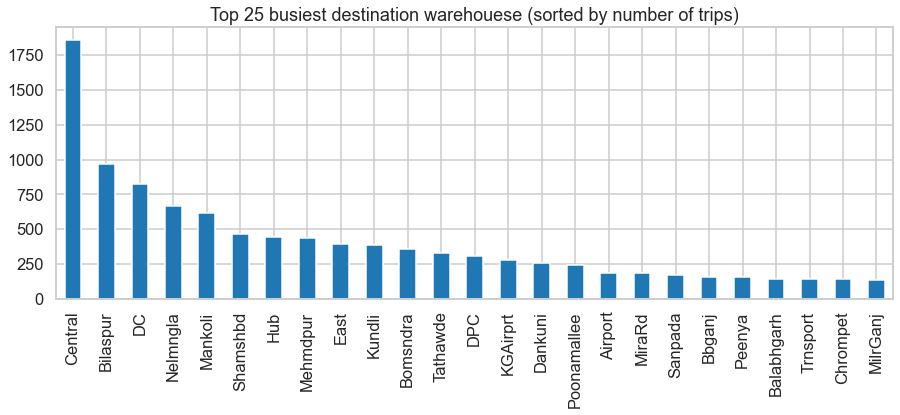

In [68]:
fl = df_trips['destination_place'].value_counts().sort_values(ascending=False)[:25].plot(kind='bar', figsize = (15,5))
fl.set_title('Top 25 busiest destination warehouese (sorted by number of trips)')

Text(0.5, 1.0, 'Top 25 busiest source warehouese (sorted by number of trips)')

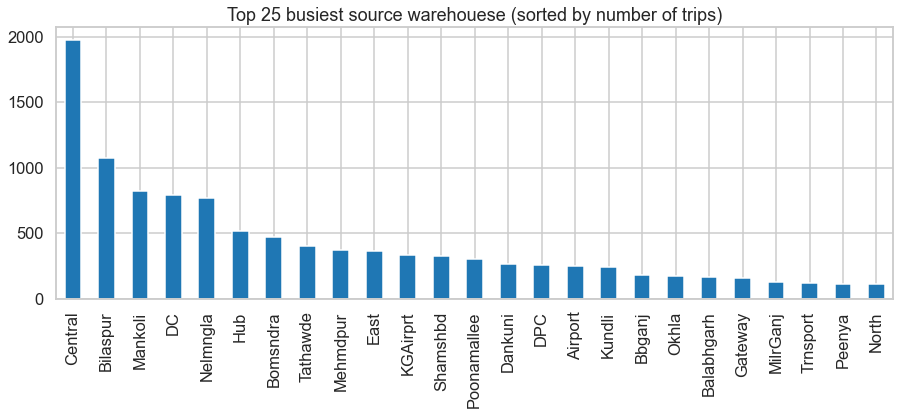

In [69]:
fl = df_trips['source_place'].value_counts().sort_values(ascending=False)[:25].plot(kind='bar', figsize = (15,5))
fl.set_title('Top 25 busiest source warehouese (sorted by number of trips)')

In [70]:
dfj =  df_trips.groupby(['source_place', 'destination_place']).\
     agg({'trip_time_mins': np.mean, 'actual_distance_to_destination': np.mean, 'trip_month':'count'})

In [71]:
dfj.rename(columns={'trip_month':'number_of_trips'}, inplace=True)
dfj.sort_values(by='number_of_trips', ascending=False, inplace=True)
dfj

trip_time_mins  \
source_place destination_place                   
Central      Central                314.066891   
Nelmngla     KGAirprt               183.541788   
             Bomsndra               279.405591   
Bomsndra     KGAirprt               198.748264   
DC           DC                     120.802174   
...                                        ...   
MIDCAvdn     Rawlgaon               148.200000   
Mahad        Central                595.780000   
MahmurGj     Central                697.830000   
             Katghara               789.020000   
Khajuria     SriDPP                 470.800000   

                                actual_distance_to_destination  \
source_place destination_place                                   
Central      Central                                 68.294410   
Nelmngla     KGAirprt                                28.031635   
             Bomsndra                                39.489763   
Bomsndra     KGAirprt                                41.727380   
DC           DC                                      40.128018   
...                                                        ...   
MIDCAvdn     Rawlgaon                                41.969124   
Mahad        Central                                136.868612   
MahmurGj     Central                                 20.946595   
             Katghara                                53.823579   
Khajuria     SriDPP                                  93.728148   

                                number_of_trips  
source_place destination_place                   
Central      Central                        402  
Nelmngla     KGAirprt                       151  
             Bomsndra                       127  
Bomsndra     KGAirprt                       121  
DC           DC                             115  
...                                         ...  
MIDCAvdn     Rawlgaon                         1  
Mahad        Central                          1  
MahmurGj     Central                          1  
             Katghara                         1  
Khajuria     SriDPP                           1  

[2375 rows x 3 columns]

# Observations:

1. Central seems to be the busiest warehouse both in terms of source and destination. The average round trip time of 402 trips is 314 units of time and 68 units of distance.
2. Second on the list of busiest warehouses is Nelmngla to KGAirprt which has about 2.6 times less than number of trips compared to Central.

##### 

# Aggregating data 2

**Now the df_agg_source_dest will be aggregated at the trip_uuid level to get the final df at the trip level**

In [72]:
df_trips.columns

Index(['trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'trip_year', 'trip_month', 'trip_creation_day',
       'destination_state', 'destination_city', 'destination_place',
       'source_state', 'source_city', 'source_place', 'trip_time_mins'],
      dtype='object')

In [73]:
df_trips.dtypes

trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
trip_year                                  int64
trip_month                                 int64
trip_creation_day   

In [74]:
# aggregate_dict_2 = {'source_center': lambda x: x.iloc[0], 'source_name':lambda x: x.iloc[0], 'destination_center': lambda x: x.iloc[-1], 'destination_name': lambda x: x.iloc[-1],
#                     'trip_creation_time': np.min, 'route_schedule_uuid': np.min, 'route_type': pd.unique, 'od_start_time': np.min, 'od_end_time': np.max, 
#                     'start_scan_to_end_scan': np.sum,
# 'actual_distance_to_destination': np.sum, 'actual_time': np.sum, 'osrm_time': np.sum, 'osrm_distance': np.sum, 'segment_actual_time': np.sum, 'segment_osrm_time': np.sum, 
# 'segment_osrm_distance': np.sum, 'trip_year' : np.max, 'trip_month':np.max, 'trip_creation_day':pd.unique,
#        'destination_state':pd.unique, 'destination_city':pd.unique, 'destination_place':pd.unique,
#        'source_state':pd.unique, 'source_city':pd.unique, 'source_place':pd.unique, 'trip_time_mins':np.sum}

aggregate_dict_2 = {'source_center': lambda x: x.iloc[0], 'source_name':lambda x: x.iloc[0], 'destination_center': lambda x: x.iloc[-1], 'destination_name': lambda x: x.iloc[-1],
                    'trip_creation_time': np.min, 'route_schedule_uuid': np.min, 'route_type': pd.unique, 'od_start_time': np.min, 'od_end_time': np.max, 
                    'start_scan_to_end_scan': np.sum,
'actual_distance_to_destination': np.sum, 'actual_time': np.sum, 'osrm_time': np.sum, 'osrm_distance': np.sum, 'segment_actual_time': np.sum, 'segment_osrm_time': np.sum, 
'segment_osrm_distance': np.sum, 'trip_year' : np.max, 'trip_month':np.max, 'trip_creation_day':'last',
       'destination_state':'last', 'destination_city':'last', 'destination_place':'last',
       'source_state':'last', 'source_city':'last', 'source_place':'last', 'trip_time_mins':np.sum}

aggregate_dict_2

{'source_center': <function __main__.<lambda>(x)>,
 'source_name': <function __main__.<lambda>(x)>,
 'destination_center': <function __main__.<lambda>(x)>,
 'destination_name': <function __main__.<lambda>(x)>,
 'trip_creation_time': <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'route_schedule_uuid': <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'route_type': <function pandas.core.algorithms.unique(values)>,
 'od_start_time': <function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'od_end_time': <function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'start_scan_to_end_scan': <function numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>,
 'actual_distance_to_destination': <function numpy.sum(a, axis=None, dtype=N

In [75]:
# tempdf = df_agg_source_dest.head(10)
tempdf = df_trips.copy()

In [76]:
pd.Timestamp('2018-09-12 16:39:46.858469') - pd.Timestamp('2018-09-12 00:00:16.535741')

Timedelta('0 days 16:39:30.322728')

In [77]:
tempdf

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,2018,9,Wednesday,Uttar Pradesh,Kanpur,Central,Madhya Pradesh,Bhopal,Trnsport,999.50
1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Uttar Pradesh,Kanpur,Central,1260.60
2,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,2018,9,Wednesday,Karnataka,Doddablpur,ChikaDPP,Karnataka,Tumkur,Veersagr,122.77
3,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,2018,9,Wednesday,Karnataka,Chikblapur,ShntiSgr,Karnataka,Doddablpur,ChikaDPP,58.82
4,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Karnataka,Bangalore,Nelmngla,3099.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,2018,10,Wednesday,Tamil Nadu,Thisayanvilai,UdnkdiRD,Tamil Nadu,Tirchchndr,Shnmgprm,62.10
26218,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,30.0,25.7087,2018,10,Wednesday,Tamil Nadu,Peikulam,SriVnktpm,Tamil Nadu,Thisayanvilai,UdnkdiRD,45.47
26219,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,2018,10,Wednesday,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu,Peikulam,SriVnktpm,91.08
26220,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42

In [78]:
len(tempdf.columns)

28

In [79]:
len(aggregate_dict_2)

27

In [80]:
df_trips =  tempdf.groupby('trip_uuid').agg(aggregate_dict_2).reset_index()

# Final aggregated data

**final aggregated data at the trip level is stored in the df_trips dataframe**

In [81]:
df_trips

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
0,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733,2018,9,Wednesday,Haryana,Gurgaon,Bilaspur,Uttar Pradesh,Kanpur,Central,2260.10
1,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,2018,9,Wednesday,Karnataka,Chikblapur,ShntiSgr,Karnataka,Doddablpur,ChikaDPP,181.59
2,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678,2018,9,Wednesday,Punjab,Chandigarh,Mehmdpur,Haryana,Gurgaon,Bilaspur,3934.35
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48
4,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,2018,9,Wednesday,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP,718.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,2018,10,Wednesday,Punjab,Chandigarh,Mehmdpur,Chandigarh,Chandigarh,Raiprkln,258.01
14783,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,2018,10,Wednesday,Haryana,Faridabad,Blbgarh,Haryana,FBD,Balabhgarh,60.58
14784,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866,2018,10,Wednesday,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,Kanpur,GovndNgr,422.10
14785,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324,2018,10,Wednesda

In [82]:
df_trips.isna().sum()

trip_uuid                           0
source_center                       0
source_name                         0
destination_center                  0
destination_name                    0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
trip_year                           0
trip_month                          0
trip_creation_day                   0
destination_state                   0
destination_city                    0
destination_place                 622
source_state                        0
source_city                         0
source_place

In [83]:
df['trip_uuid'].nunique()

14787

# Outliers

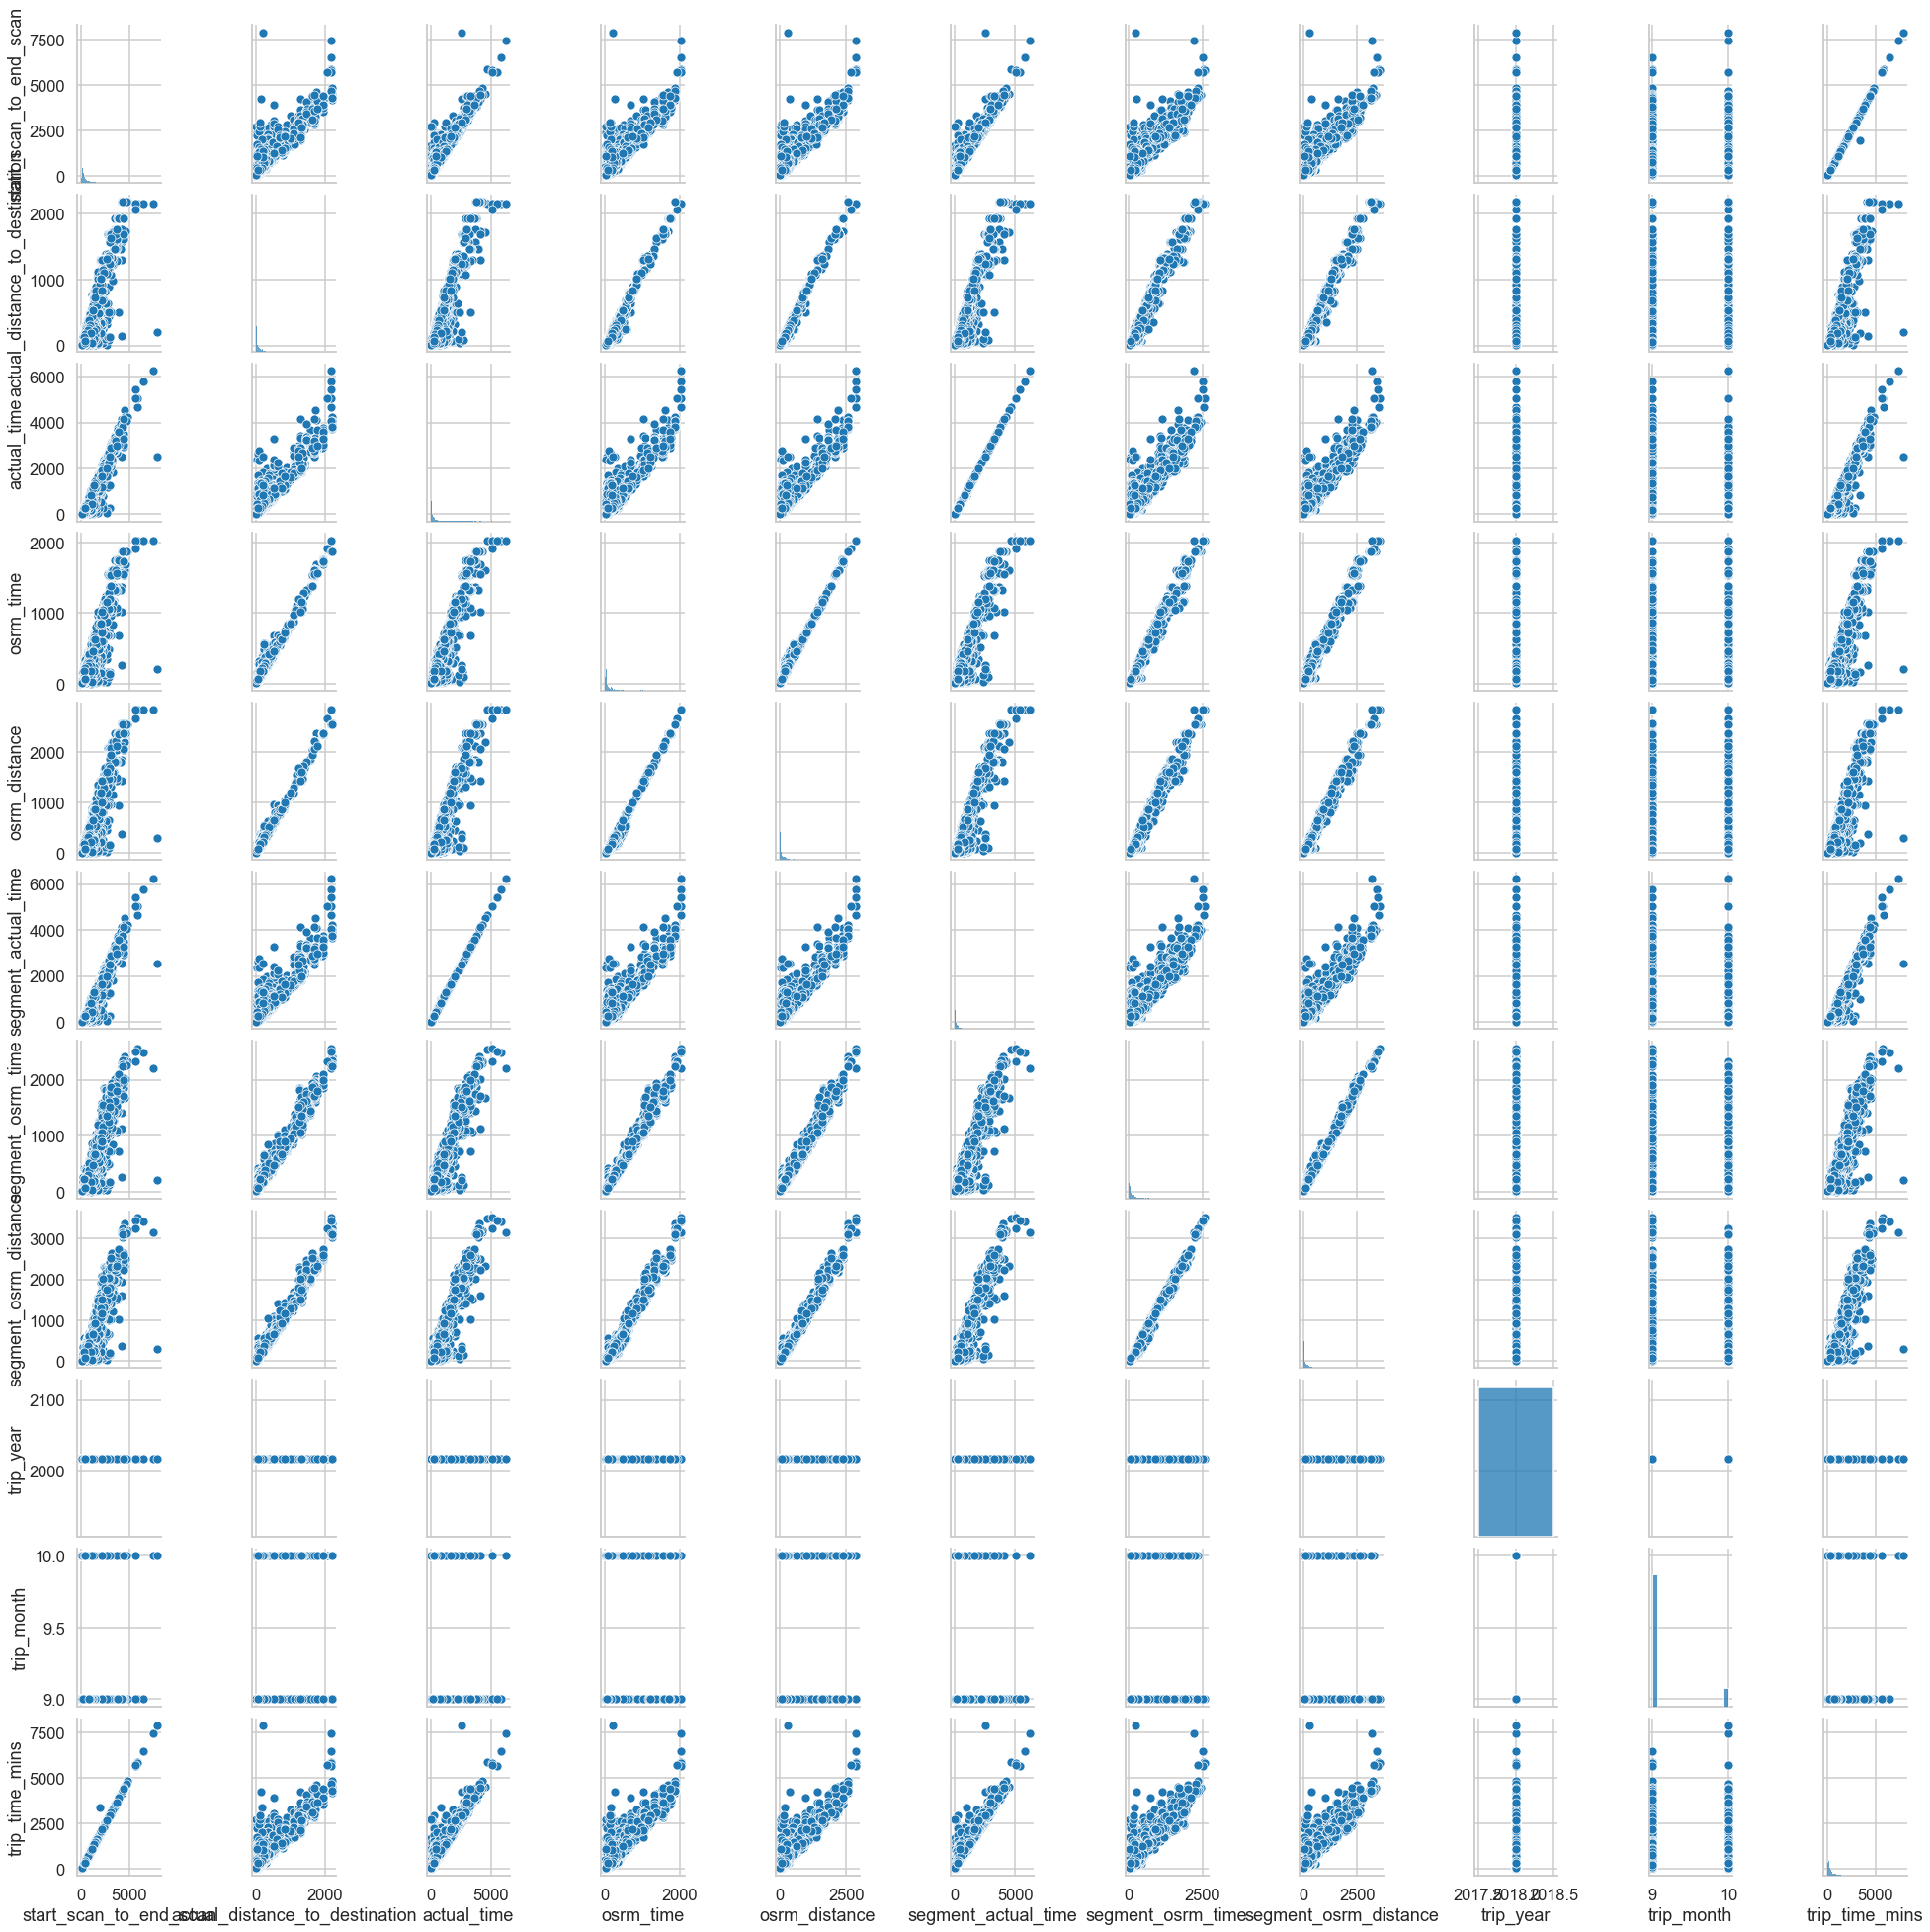

In [84]:
sns.pairplot(df_trips)

# Observations

1. distance_to_destination is correlated with osrm_time, osrm_distance, segment_osrm_time, and segment_osrm_distance.
2. actual_time is also correlated with osrm_time, osrm_distance, segment_osrm_time, and segment_osrm_distance.

In [85]:
df_trips.columns

Index(['trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'trip_year', 'trip_month', 'trip_creation_day',
       'destination_state', 'destination_city', 'destination_place',
       'source_state', 'source_city', 'source_place', 'trip_time_mins'],
      dtype='object')

#### Numerical columns

In [86]:
num_cols = [i for i in df.columns if df_trips[i].dtype !='object']
num_cols

['trip_creation_time',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [87]:
## These features contain outliers as it can be clearly seen from the section of hypothesis testing
columns_with_outliers = ['actual_distance_to_destination', 'start_scan_to_end_scan', 'actual_time','osrm_time', 
                         'osrm_distance', 'segment_actual_time','segment_osrm_time','segment_osrm_distance']

In [88]:
# 1.5*(df_trips['actual_distance_to_destination'].quantile(0.75) - df_trips['actual_distance_to_destination'].quantile(0.25))

In [89]:
# df_trips[df_trips['actual_distance_to_destination']<211.29]

Text(0.5, 1.0, 'Box plots of numerical variables')

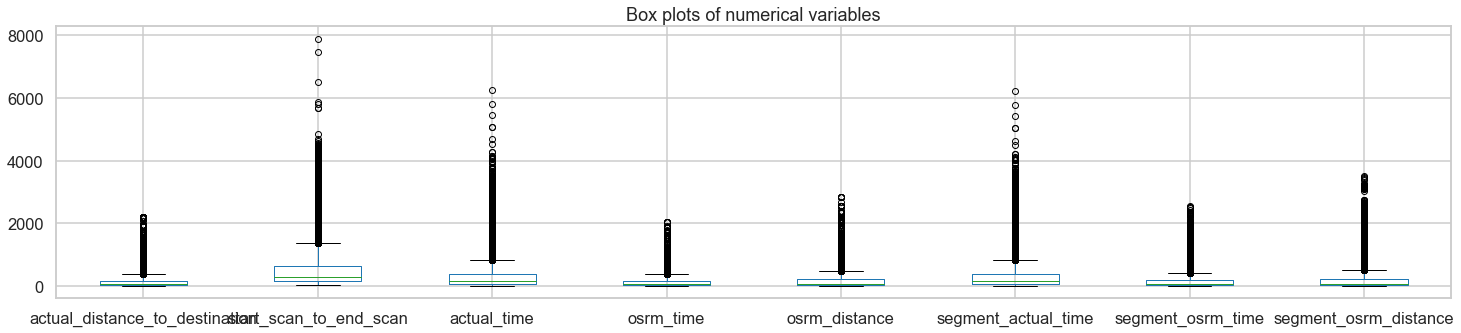

In [90]:
# IQR_trimming(df_trips, 'actual_distance_to_destination').plot(kind='box', figsize=(25,5))
pl = df_trips[columns_with_outliers].plot(kind='box', figsize=(25,5))
pl.set_title('Box plots of numerical variables')

In [91]:
dfx = df_trips.copy()

In [92]:
##function to remove the outliers based on the IQR values. Only the values more than 1.5*IQR will be removed.
## the plots will be checked after each removal of outliers.

def IQR_trimming(df, col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    df_temp = df.copy()
    df_temp = df_temp[df_temp[col]<1.5*iqr]
    print(f'The shape of df is {df_temp.shape}')
    return df_temp

Text(0.5, 1.0, 'Box plots of numerical variables without outlier removal')

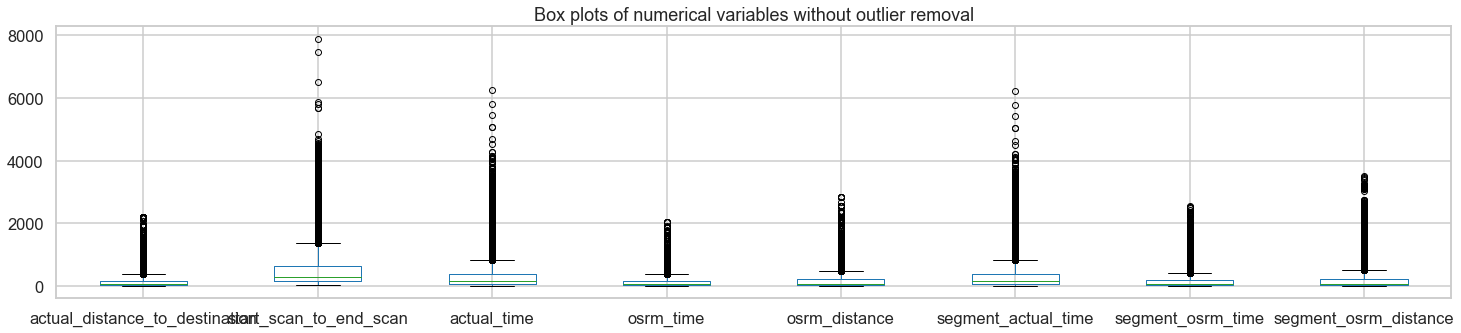

In [93]:
plx = dfx[columns_with_outliers].plot(kind='box', figsize=(25,5))
plx.set_title('Box plots of numerical variables without outlier removal')

In [94]:
dfx = IQR_trimming(dfx, 'actual_time')

The shape of df is (11753, 28)


Text(0.5, 1.0, 'Box plots of numerical variables after actual_time trimming')

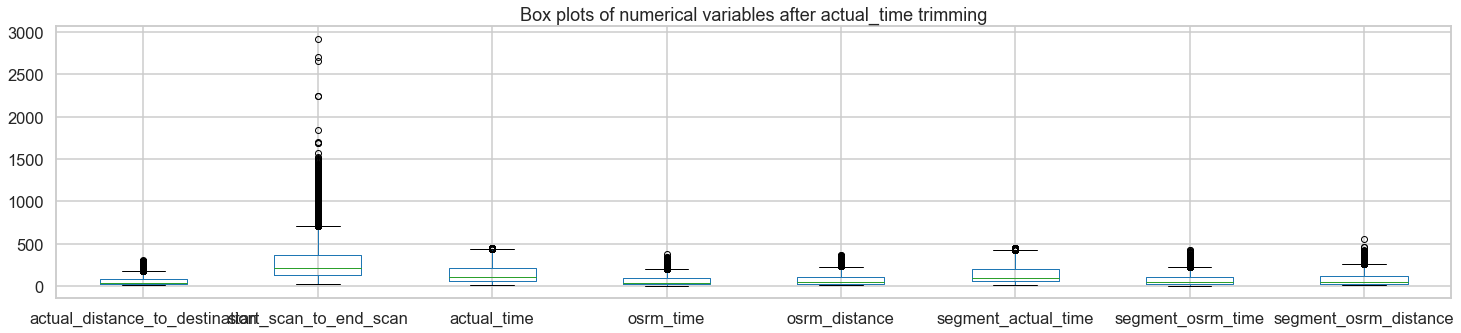

In [95]:
plx = dfx[columns_with_outliers].plot(kind='box', figsize=(25,5))
plx.set_title('Box plots of numerical variables after actual_time trimming')

In [96]:
dfx = IQR_trimming(dfx, 'start_scan_to_end_scan')

The shape of df is (8634, 28)


Text(0.5, 1.0, 'Box plots of numerical variables after start_scan_to_end_scan trimming')

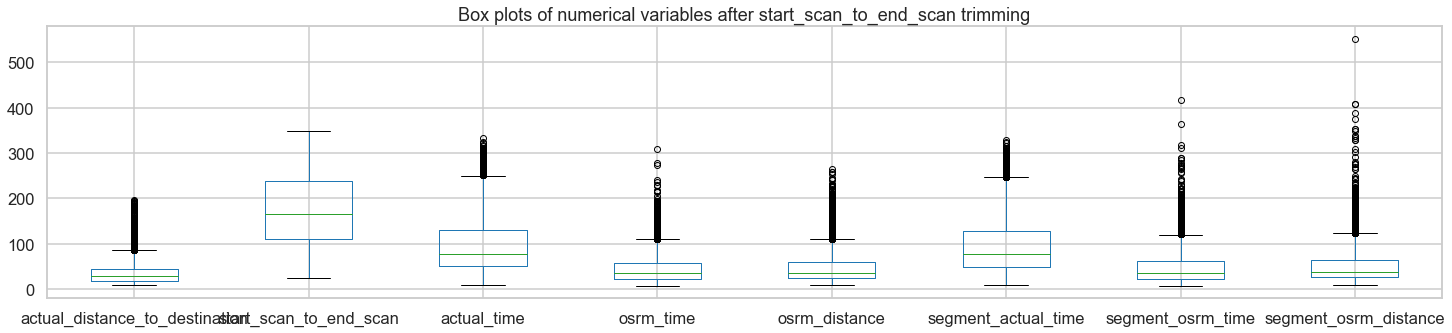

In [97]:
plx = dfx[columns_with_outliers].plot(kind='box', figsize=(25,5))
plx.set_title('Box plots of numerical variables after start_scan_to_end_scan trimming')

In [98]:
dfx = IQR_trimming(dfx, 'segment_osrm_distance')

The shape of df is (6232, 28)


Text(0.5, 1.0, 'Box plots of numerical variables after start_scan_to_end_scan trimming')

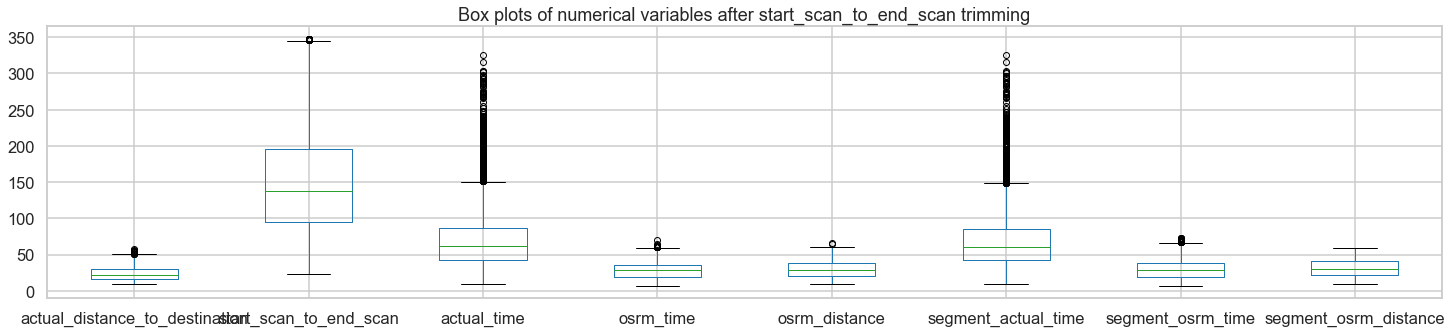

In [99]:
plx = dfx[columns_with_outliers].plot(kind='box', figsize=(25,5))
plx.set_title('Box plots of numerical variables after start_scan_to_end_scan trimming')

In [100]:
dfx = IQR_trimming(dfx, 'actual_time')

The shape of df is (3339, 28)


Text(0.5, 1.0, 'Box plots of numerical variables after actual_time trimming')

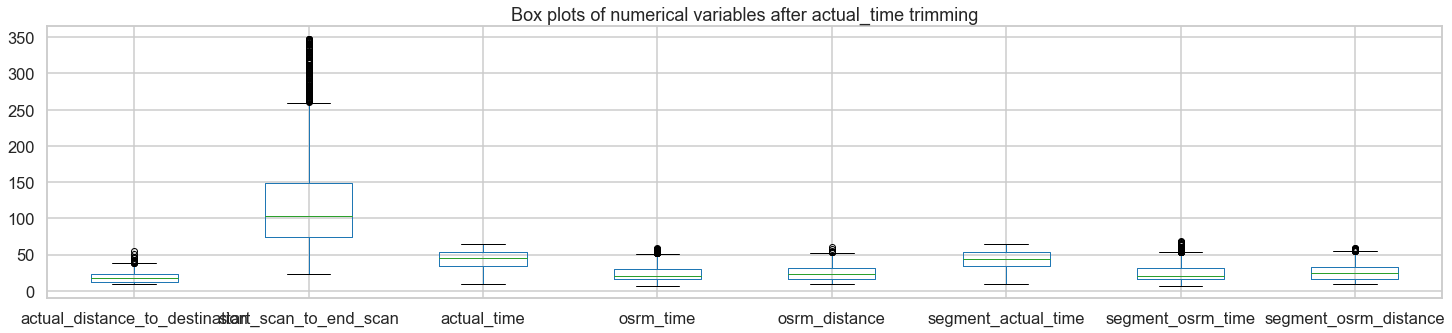

In [101]:
plx = dfx[columns_with_outliers].plot(kind='box', figsize=(25,5))
plx.set_title('Box plots of numerical variables after actual_time trimming')

In [102]:
# for i in columns_with_outliers:
#     print(i)
#     dfx = IQR_trimming(dfx, i)

In [103]:
dfx.shape

(3339, 28)

In [104]:
df_trips_after_aggregation = df_trips.copy()

In [105]:
df_trips = dfx.copy()

# Observations

1. Almost, all the numerical features contain outliers.<br> 

2. It is also expected as the numerical features are representing a notion of time or distance. As a result, it shows that some deliveries take unusually long time or the distance travelled to make some delivery is unusually large. <br>

3. Also, the outliers are only in one direction. It is indicative of the log normal distribution.

4. While trimming the outliers, only the upper values are removed via 1.5*IQR. Not all columns need to be treated explicitely as some of the columns are corelated to each other which automatically takes care of itself.

# Hypothesis tests: the value of alpha is 5% unless stated otherwise

# 1. start_scan_to_end_scan    vs    trip_time_mins

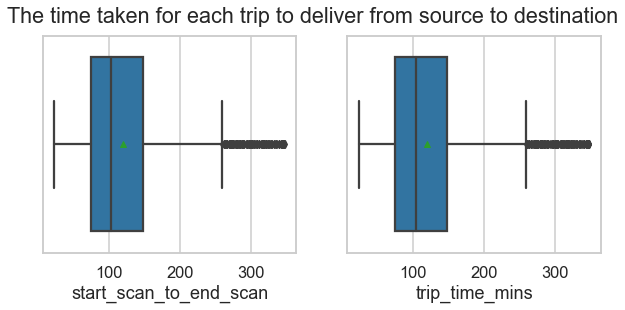

In [106]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
plt.suptitle('The time taken for each trip to deliver from source to destination')
sns.boxplot(data=df_trips, x='start_scan_to_end_scan', ax=ax1,showmeans=True)
sns.boxplot(data=df_trips, x='trip_time_mins', ax=ax2, showmeans=True)
plt.show()

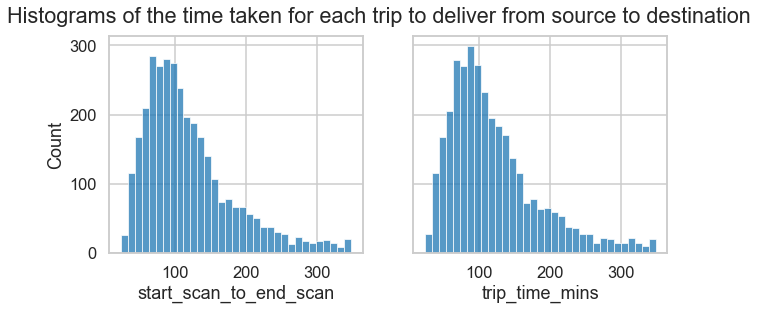

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
plt.suptitle('Histograms of the time taken for each trip to deliver from source to destination')
sns.histplot(data=df_trips, x='start_scan_to_end_scan', ax=ax1)
sns.histplot(data=df_trips, x='trip_time_mins', ax=ax2, )
plt.show()

In [108]:
df_trips['start_scan_to_end_scan'].mean(), df_trips['trip_time_mins'].mean()

(119.29919137466307, 119.81094938604411)

Visually, both the features look the same. There is some difference in the mean value of delivery time. <br>

A two sample independent ttest should be done to see if the difference is statistically significant or not. Testing of assumptions is not mandatory by the virtue of CLT

In [109]:
test_type = 'greater'
test = '2 sample independent t-test'
print(' ')
print(f'############## {test} ################')
print(' ')
print('H0: There is no difference in the population mean of the delivery times between the two features')
print(' ')
print('Ha1: The mean delivery time for trip_time_mins is greater than start_scan_to_end_scan.')
print(' ')
test_result = ttest_ind(df_trips['start_scan_to_end_scan'], df_trips['trip_time_mins'], alternative = test_type)
print(f'Results of the test:')
print(' ')
print(f'Test-type: {test_type}')
print(test_result)
print(' ')
print('Since the p-value is more than 0.05, we fail to reject the null hypothesis.')
print(' ')
print('Inference: There is no difference in the population mean of the two features (start_scan_to_end_scan and trip_time_mins)')

 
############## 2 sample independent t-test ################
 
H0: There is no difference in the population mean of the delivery times between the two features
 
Ha1: The mean delivery time for trip_time_mins is greater than start_scan_to_end_scan.
 
Results of the test:
 
Test-type: greater
Ttest_indResult(statistic=-0.32770213869406256, pvalue=0.628426419022026)
 
Since the p-value is more than 0.05, we fail to reject the null hypothesis.
 
Inference: There is no difference in the population mean of the two features (start_scan_to_end_scan and trip_time_mins)


##### 

# 2. actual aggregated time and osrm aggregated time

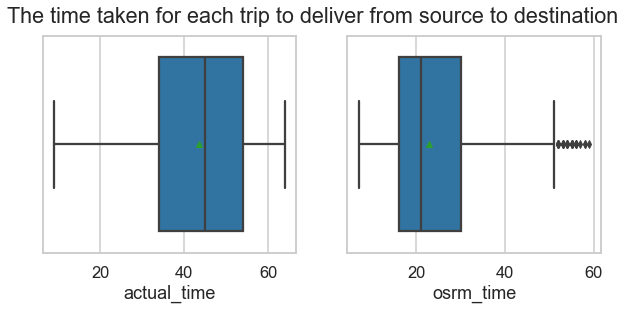

In [110]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
plt.suptitle('The time taken for each trip to deliver from source to destination')
sns.boxplot(data=df_trips, x='actual_time', ax=ax1,showmeans=True)
sns.boxplot(data=df_trips, x='osrm_time', ax=ax2, showmeans=True)
plt.show()

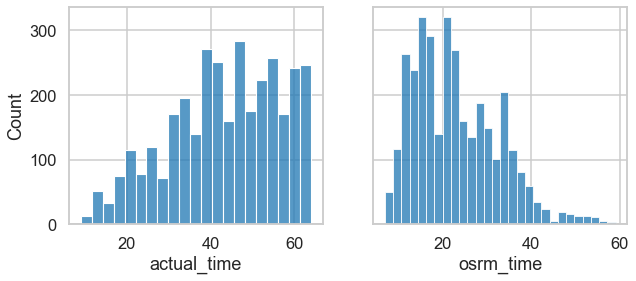

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('Histograms of the time taken for each trip to deliver from source to destination')
sns.histplot(data=df_trips, x='actual_time', ax=ax1)
sns.histplot(data=df_trips, x='osrm_time', ax=ax2, )
plt.show()

In [112]:
df_trips['actual_time'].mean(), df_trips['osrm_time'].mean()

(43.41479484875711, 22.90116801437556)

Visually, there is some difference in the features. The mean values are also different. <br>

A two sample independent ttest should be done to see if the difference is statistically significant or not. Testing of assumptions is not mandatory by the virtue of CLT

In [113]:
test_type = 'greater'
test = '2 sample independent t-test'
print(' ')
print(f'############## {test} ################')
print(' ')
print('H0: There is no difference in the population mean between the two features')
print(' ')
print('Ha1: The mean delivery time for actual_time is greater than osrm_time.')
print(' ')
test_result = ttest_ind(df_trips['actual_time'], df_trips['osrm_time'], alternative = test_type)
print(f'Results of the test:')
print(' ')
print(f'Test-type: {test_type}')
print(test_result)
print(' ')
print('Since the p-value is less than 0.05, we reject the null hypothesis.')
print(' ')
print('Inference: The mean delivery time from the feature actual_time is greater than osrm_time.')

 
############## 2 sample independent t-test ################
 
H0: There is no difference in the population mean between the two features
 
Ha1: The mean delivery time for actual_time is greater than osrm_time.
 
Results of the test:
 
Test-type: greater
Ttest_indResult(statistic=72.75129388424659, pvalue=0.0)
 
Since the p-value is less than 0.05, we reject the null hypothesis.
 
Inference: The mean delivery time from the feature actual_time is greater than osrm_time.


##### 

# 3. actual_time aggregated value and segment_actual_time aggregated value 

In [114]:
df_trips.head(3)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48
5,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,2018,9,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,190.47
6,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,2018,9,Wednesday,Tamil Nadu,Chennai,Vandalur,Tamil Nadu,Chennai,Chrompet,98.00


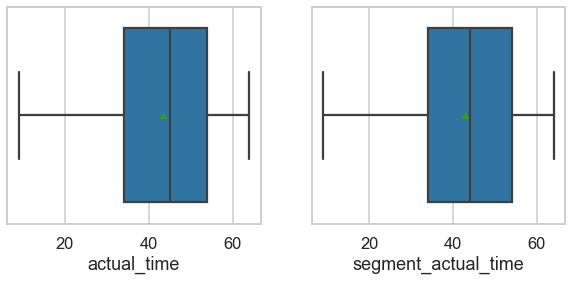

In [115]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('The time taken for each trip to deliver from source to destination')
sns.boxplot(data=df_trips, x='actual_time', ax=ax1,showmeans=True)
sns.boxplot(data=df_trips, x='segment_actual_time', ax=ax2, showmeans=True)
plt.show()

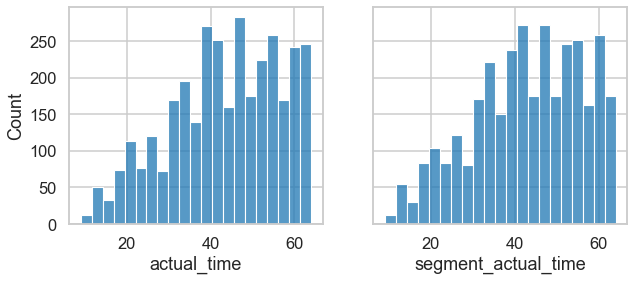

In [116]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('Histograms of the time taken for each trip to deliver from source to destination')
sns.histplot(data=df_trips, x='actual_time', ax=ax1)
sns.histplot(data=df_trips, x='segment_actual_time', ax=ax2, )
plt.show()

In [117]:
df_trips['actual_time'].mean(), df_trips['segment_actual_time'].mean()

(43.41479484875711, 42.889787361485475)

Visually, there is no difference in the features. The mean values are close. <br>

A two sample independent ttest should be done to see if the difference is statistically significant or not. Testing of assumptions is not mandatory by the virtue of CLT

In [118]:
test_type = 'greater'
test = '2 sample independent t-test'
print(' ')
print(f'############## {test} ################')
print(' ')
print('H0: There is no difference in the population mean of the delivery times between the two features')
print(' ')
print('Ha1: The mean delivery time for actual_time is greater than segment_actual_time.')
print(' ')
test_result = ttest_ind(df_trips['actual_time'], df_trips['segment_actual_time'], alternative = test_type)
print(f'Results of the test:')
print(' ')
print(f'Test-type: {test_type}')
print(test_result)
print(' ')
print('Since the p-value is more than 0.05, we fail to reject the null hypothesis.')
print(' ')
print('Inference: There is no difference in the population mean of the two features (actual_time and segment_actual_time)')

 
############## 2 sample independent t-test ################
 
H0: There is no difference in the population mean of the delivery times between the two features
 
Ha1: The mean delivery time for actual_time is greater than segment_actual_time.
 
Results of the test:
 
Test-type: greater
Ttest_indResult(statistic=1.6322220968954682, pvalue=0.05133993495788495)
 
Since the p-value is more than 0.05, we fail to reject the null hypothesis.
 
Inference: There is no difference in the population mean of the two features (actual_time and segment_actual_time)


# 4. osrm_distance aggregated value and segment_osrm_distance aggregated value

In [119]:
df_trips.head(3)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48
5,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,2018,9,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,190.47
6,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,2018,9,Wednesday,Tamil Nadu,Chennai,Vandalur,Tamil Nadu,Chennai,Chrompet,98.00


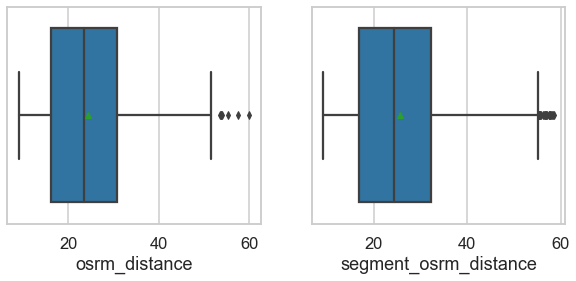

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('The time taken for each trip to deliver from source to destination')
sns.boxplot(data=df_trips, x='osrm_distance', ax=ax1,showmeans=True)
sns.boxplot(data=df_trips, x='segment_osrm_distance', ax=ax2, showmeans=True)
plt.show()

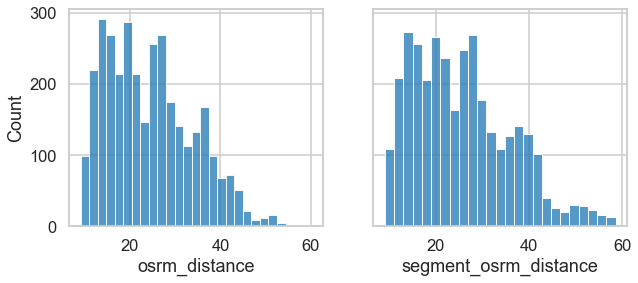

In [121]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('Histograms of the time taken for each trip to deliver from source to destination')
sns.histplot(data=df_trips, x='osrm_distance', ax=ax1)
sns.histplot(data=df_trips, x='segment_osrm_distance', ax=ax2, )
plt.show()

In [122]:
df_trips['osrm_distance'].mean(), df_trips['segment_osrm_distance'].mean()

(24.35084561245877, 25.557730098832014)

Visually, there is some difference in the features and the mean values. <br>

A two sample independent ttest should be done to see if the difference is statistically significant or not. Testing of assumptions is not mandatory by the virtue of CLT

In [123]:
test_type = 'less'
test = '2 sample independent t-test'
print(' ')
print(f'############## {test} ################')
print(' ')
print('H0: There is no difference in the population mean of the distance represented by the two features')
print(' ')
print('Ha1: The mean distance for osrm_distance is smaller than segment_osrm_distance.')
print(' ')
test_result = ttest_ind(df_trips['osrm_distance'], df_trips['segment_osrm_distance'], alternative = test_type)
print(f'Results of the test:')
print(' ')
print(f'Test-type: {test_type}')
print(test_result)
print(' ')
print('Since the p-value is less than 0.05, we reject the null hypothesis.')
print(' ')
print('Inference: There is a difference in the population mean of the two features (osrm_distance and segment_osrm_distance)')

 
############## 2 sample independent t-test ################
 
H0: There is no difference in the population mean of the distance represented by the two features
 
Ha1: The mean distance for osrm_distance is smaller than segment_osrm_distance.
 
Results of the test:
 
Test-type: less
Ttest_indResult(statistic=-4.933141185409495, pvalue=4.1438057085771153e-07)
 
Since the p-value is less than 0.05, we reject the null hypothesis.
 
Inference: There is a difference in the population mean of the two features (osrm_distance and segment_osrm_distance)


# 5. osrm time aggregated value and segment osrm time aggregated value

In [124]:
df_trips.head(2)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48
5,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,2018,9,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,190.47


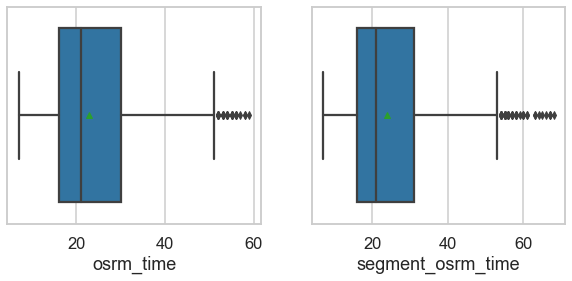

In [125]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('The time taken for each trip to deliver from source to destination')
sns.boxplot(data=df_trips, x='osrm_time', ax=ax1,showmeans=True)
sns.boxplot(data=df_trips, x='segment_osrm_time', ax=ax2, showmeans=True)
plt.show()

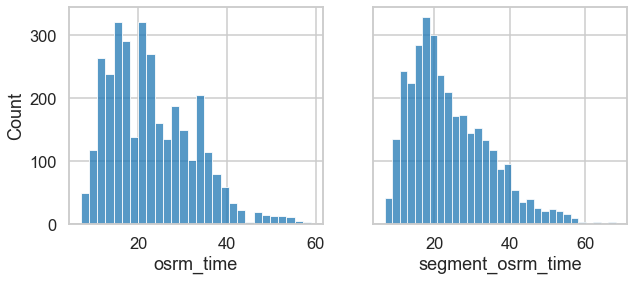

In [126]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('Histograms of the time taken for each trip to deliver from source to destination')
sns.histplot(data=df_trips, x='osrm_time', ax=ax1)
sns.histplot(data=df_trips, x='segment_osrm_time', ax=ax2, )
plt.show()

In [127]:
df_trips['osrm_time'].mean(), df_trips['segment_osrm_time'].mean()

(22.90116801437556, 23.898173105720275)

Visually, there is a difference in the features. <br>

A two sample independent ttest should be done to see if the difference is statistically significant or not. Testing of assumptions is not mandatory by the virtue of CLT

In [128]:
test_type = 'less'
test = '2 sample independent t-test'
print(' ')
print(f'############## {test} ################')
print(' ')
print('H0: There is no difference in the population mean of the delivery times between the two features')
print(' ')
print('Ha1: The mean delivery time for actual_time is greater than segment_actual_time.')
print(' ')
test_result = ttest_ind(df_trips['osrm_time'], df_trips['segment_osrm_time'], alternative = test_type)
print(f'Results of the test:')
print(' ')
print(f'Test-type: {test_type}')
print(test_result)
print(' ')
print('Since the p-value is less than 0.05, we reject the null hypothesis.')
print(' ')
print('Inference: There is a difference in the population mean of the two features (actual_time and segment_actual_time)')

 
############## 2 sample independent t-test ################
 
H0: There is no difference in the population mean of the delivery times between the two features
 
Ha1: The mean delivery time for actual_time is greater than segment_actual_time.
 
Results of the test:
 
Test-type: less
Ttest_indResult(statistic=-4.01195303246896, pvalue=3.0438175128481204e-05)
 
Since the p-value is less than 0.05, we reject the null hypothesis.
 
Inference: There is a difference in the population mean of the two features (actual_time and segment_actual_time)


# 6. FTL vs carting

In [129]:
df_trips.head(2)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48
5,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,2018,9,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,190.47


In [130]:
FTL = df_trips[df_trips['route_type']=='FTL']['trip_time_mins']
carting = df_trips[df_trips['route_type']=='Carting']['trip_time_mins']

In [131]:
FTL.mean(), carting.mean()

(97.34925925925927, 120.75736891385803)

In [132]:
len(FTL), len(carting)

(135, 3204)

/Users/harshal.agrawal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harshal.agrawal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


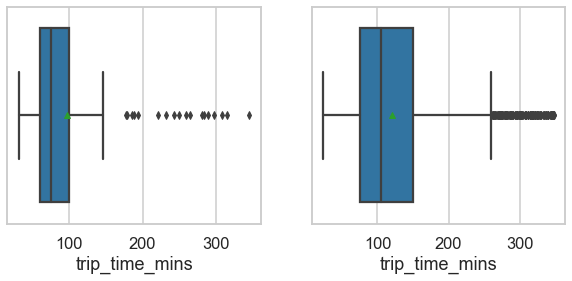

In [133]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
# plt.suptitle('The time taken for each trip to deliver from source to destination')
sns.boxplot(FTL, ax=ax1,showmeans=True)
sns.boxplot(carting, ax=ax2, showmeans=True)
plt.show()

###### 

# Miscellaneous analysis

Please note: the remaining analysis is done on the df that is with the outliers as it makes more sense here.

In [134]:
#  df_trips = df_trips_after_aggregation.copy()

In [135]:
df_trips

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48
5,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,2018,9,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,190.47
6,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,2018,9,Wednesday,Tamil Nadu,Chennai,Vandalur,Tamil Nadu,Chennai,Chrompet,98.00
7,trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203,2018,9,Wednesday,Karnataka,HBR Layout PC,NwYlhnka,Karnataka,Bengaluru,Bagaluru,146.83
9,trip-153671079956500691,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,2018-09-12 00:06:39.565253,2018-09-12 00:55:59.568645,49.0,9.872146,23.0,8.0,10.0040,23.0,14.0,16.0860,2018,9,Wednesday,Delhi,Delhi,Bhogal,Delhi,Delhi,Lajpat,49.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14777,trip-153861089403973335,IND390022AAA,Vadodara_Karelibaug_DPC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-10-03 23:54:54.039992,thanos::sroute:233c5ce2-a1e2-4550-945c-28c357c...,Carting,2018-10-03 23:54:54.039992,2018-10-04 01:33:37.635402,98.0,33.898361,49.0,36.0,45.1574,48.0,40.0,50.0725,2018,10,Wednesday,Gujarat,Anand,Vaghasi,Gujarat,Vadodara,Karelibaug,98.72
14779,trip-153861089872028474,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602001AAA,Chennai_Thiruvlr_DC (Tamil Nadu),2018-10-03 23:54:58.720536,thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...,Carting,2018-10-03 23:54:58.720536,2018-10-04 02:57:23.720337,181.0,27.010926,62.0,28.0,38.2867,61.0,33.0,33.6400,2018,10,Wednesday,Tamil Nadu,Chennai,Thiruvlr,Tamil Nadu,Chennai,Vepmpttu,182.40
14780,trip-153861090163768194,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-10-03 23:55:01.637939,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-10-04 02:09:14.276831,2018-10-04 03:07:24.591271,58.0,15.135009,42.0,12.0,15.8436,41.0,11.0,15.8436,2018,10,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,58.17
14781,trip-153861091843037040,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-10-03 23:55:18.430664,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-10-03 23:55:18.430664,2018-10-04 01:23:31.389882,88.0,17.760248,38.0,16.0,20.5065,37.0,16.0,20.5065,2018,10,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,No

In [136]:
# df_trips.head()

In [137]:
df_trips['trip_year'].value_counts()

2018    3339
Name: trip_year, dtype: int64

In [138]:
df_trips['trip_month'].value_counts()

9     2888
10     451
Name: trip_month, dtype: int64

Text(0.5, 1.0, 'Number of order booked aggregated via day of the week')

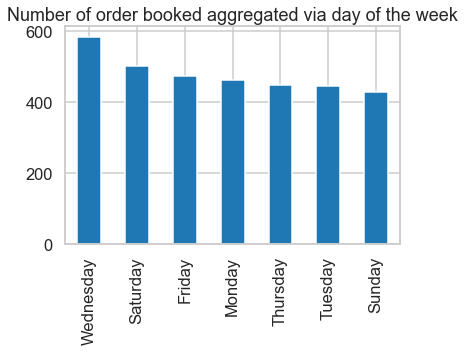

In [139]:
df_trips['trip_creation_day'].value_counts().plot(kind='bar')
plt.title('Number of order booked aggregated via day of the week')

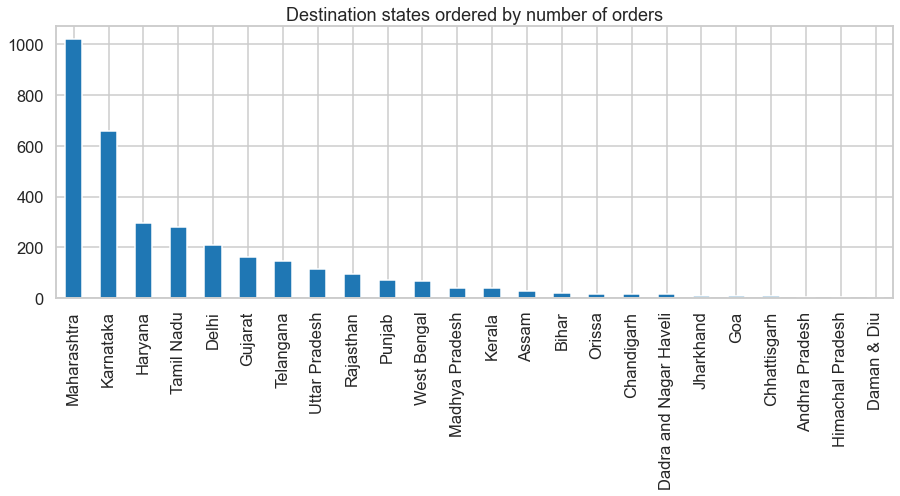

In [140]:
plt.figure(figsize=(15,5))
df_trips['destination_state'].value_counts().plot(kind='bar')
plt.title('Destination states ordered by number of orders')
plt.show()

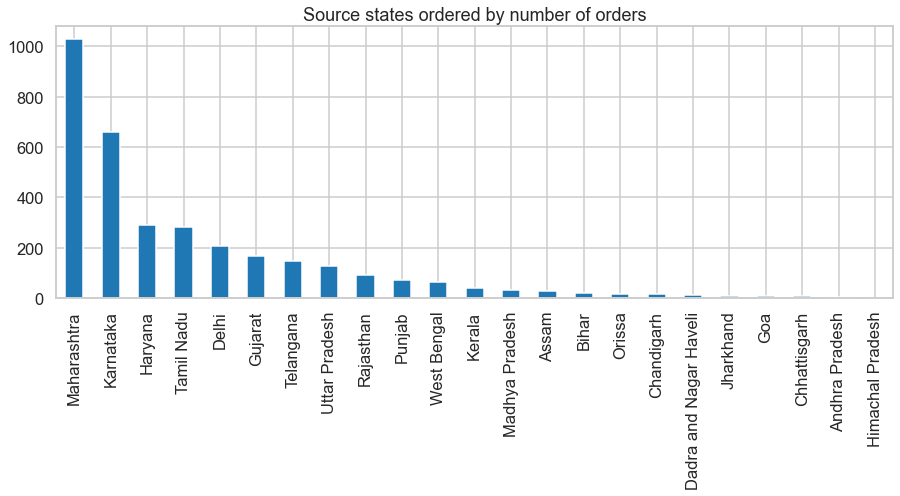

In [141]:
plt.figure(figsize=(15,5))
df_trips['source_state'].value_counts().plot(kind='bar')
plt.title('Source states ordered by number of orders')
plt.show()

Same source and destination center code

If the source and destinaion center codes are same, it is assumed that the order was cancelled midway and returned to the source.

In [142]:
df_returned = df_trips[df_trips['source_center'] == df_trips['destination_center']]
df_returned.head(3)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins
7,trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203,2018,9,Wednesday,Karnataka,HBR Layout PC,NwYlhnka,Karnataka,Bengaluru,Bagaluru,146.83
94,trip-153671851245407364,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-12 02:15:12.454312,thanos::sroute:732151e0-7610-4950-b61e-da7ea60...,Carting,2018-09-12 02:15:12.454312,2018-09-12 05:17:20.484935,98.0,18.874688,52.0,23.0,24.2837,52.0,23.0,24.2837,2018,9,Wednesday,Madhya Pradesh,Bhopal,Trnsport,Madhya Pradesh,Bhopal MP Nagar,Trnsport,98.95
193,trip-153672887541821030,IND144001AAB,Jalandhar_DPC (Punjab),IND144001AAB,Jalandhar_DPC (Punjab),2018-09-12 05:07:55.418586,thanos::sroute:6b1aa241-516a-497b-9a46-37fa1b8...,Carting,2018-09-12 05:07:55.418586,2018-09-12 06:36:29.988192,87.0,21.589513,50.0,23.0,26.2190,50.0,22.0,26.2190,2018,9,Wednesday,Punjab,Jalandhar,DPC,Punjab,Phagwara,Lovely,88.57


In [143]:
df_returned.shape

(83, 28)

In [144]:
## percent order returned
2946/len(df_trips)*100

88.23000898472596

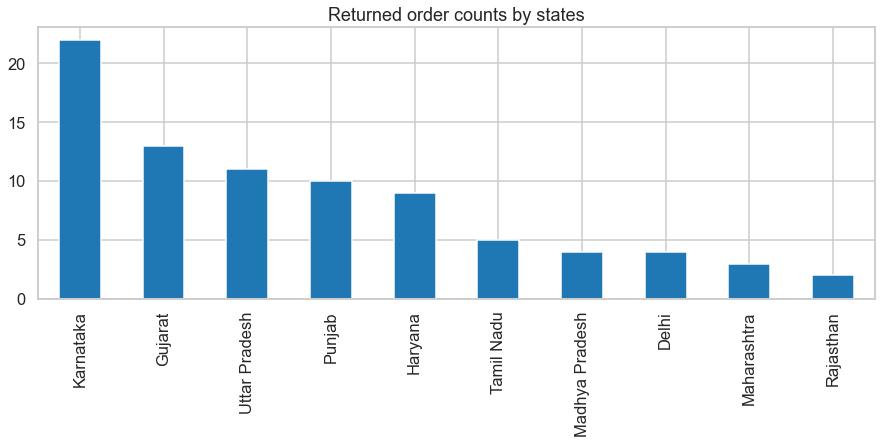

In [145]:
plt.figure(figsize=(15,5))
df_returned['source_state'].value_counts().plot(kind='bar')
plt.title('Returned order counts by states')
plt.show()

In [146]:
df_returned['source_state'].value_counts()

Karnataka         22
Gujarat           13
Uttar Pradesh     11
Punjab            10
Haryana            9
Tamil Nadu         5
Madhya Pradesh     4
Delhi              4
Maharashtra        3
Rajasthan          2
Name: source_state, dtype: int64

In [147]:
(340+271+248+236+232+202)/2946

0.5190088255261371

In [148]:
df_trips['source_state'].nunique(), df_trips['source_city'].nunique()

(23, 171)

In [149]:
df_trips['destination_state'].nunique(), df_trips['destination_city'].nunique()

(24, 181)

In [150]:
df1 = df_trips[df_trips['source_state']!=df_trips['destination_state']].\
    groupby(['source_state', 'destination_state']).\
    agg({'trip_time_mins': np.median, 'actual_distance_to_destination': np.median, 'trip_month':'count'})

In [151]:
df1.head(2)

,,trip_time_mins,actual_distance_to_destination,trip_month
source_state,destination_state,,,
Chandigarh,Punjab,150.120,31.457484,14
Dadra and Nagar Haveli,Gujarat,70.075,14.326058,14


In [152]:
df1.rename(columns={'trip_month':'number_of_trips'}, inplace=True)
df1.sort_values(by='number_of_trips', ascending=False, inplace=True)
df1

,,trip_time_mins,actual_distance_to_destination,number_of_trips
source_state,destination_state,,,
Delhi,Haryana,128.550,32.873983,54
Haryana,Delhi,132.800,32.179737,48
Uttar Pradesh,Delhi,182.975,10.880930,28
Delhi,Uttar Pradesh,99.730,11.666748,20
Gujarat,Dadra and Nagar Haveli,72.420,14.594157,17
Punjab,Chandigarh,215.650,31.776440,16
Chandigarh,Punjab,150.120,31.457484,14
Dadra and Nagar Haveli,Gujarat,70.075,14.326058,14
Maharashtra,Madhya Pradesh,86.050,35.223845,9


In [153]:
df_trips['trip_creation_time'].min(), df_trips['trip_creation_time'].max()

(Timestamp('2018-09-12 00:01:00.113710'),
 Timestamp('2018-10-03 23:57:23.863155'))

In [154]:
df_trips[df_trips['trip_month']==9]['trip_creation_time'].min(), df_trips[df_trips['trip_month']==9]['trip_creation_time'].max()

(Timestamp('2018-09-12 00:01:00.113710'),
 Timestamp('2018-09-30 23:57:50.622170'))

In [155]:
df_trips[df_trips['trip_month']==10]['trip_creation_time'].min(), df_trips[df_trips['trip_month']==10]['trip_creation_time'].max()

(Timestamp('2018-10-01 00:01:57.475678'),
 Timestamp('2018-10-03 23:57:23.863155'))

In [156]:
# gp = df_trips[df_trips['source_state']!=df_trips['destination_state']].groupby(['source_state', 'destination_state'])

In [157]:
# gp.get_group(('Orissa','Andhra Pradesh'))

## Observations:

1. The data is from October and November of 2018.
2. Most number of orders are booked on Wednesday and least on Sunday. Remaining days see more or less same number of order booking.
3. Maharashtra, Karnataka, and Haryana are the top 3 states both in terms of source or destination or orders while Nagaland is in bottom 3.
4. About 20% orders have the same source and destination codes (before outlier treatment).
5. The company has 671 source hubs across 29 states and 767 destination cities across 32 states. 
5. Maharashtra, Tamil Nadu, Karnataka, Punjab, Andra and Uttar Pradesh are the 6 states that account for 51% of the returned orders (before outlier treatment).
6. The mean time for delivery with FTL is higher than that with carting.
7. Most orders are shipped between Delhi and Haryana. The average time to delivery is 189 units of time and distance is 41 units.

# Recommendations

1. The mean actual time of delivery is higher than the estimated ‘osrm time’. The difference is statistically significant. The company can consider cutting down the budget for this estimation. 
2. Wednesdays have a surge of orders across sources and destinations. It might help to introduce dynamic pricing for Wednesday to balance the traffic load and distribute it for other days of the week for booking the orders.
3. Tripura, Nagaland, Daman & Diu, Arunachal Pradesh, and Mizoram are among the bottom 5 states in either source or destination. It is worthwhile to contrast it with the top 5 destinations/sources and understand the reason for low orders. Is it because of less population in the states or poor representation of the company in these states? Based on the survey, appropriate actions should be taken.


##### 

# One hot encoding of the categorical variables

In [158]:
df_trips2 = df_trips.copy()

In [159]:
# categorical columns

[i for i in df_trips2.columns if df_trips2[i].dtype == 'object']

['trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'route_schedule_uuid',
 'route_type',
 'trip_creation_day',
 'destination_state',
 'destination_city',
 'destination_place',
 'source_state',
 'source_city',
 'source_place']

route_type will be encoded in the data

In [160]:
df_trips2 = pd.get_dummies(data=df_trips2, columns=['route_type'])

In [161]:
df_trips2.head(2)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins,route_type_Carting,route_type_FTL
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48,1,0
5,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,2018,9,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,190.47,1,0


At the end, one can see that the column in encoded.

# Min max scaling of the data as it has a lot of outliers


Note: The scaling is applied to the entire data set and not split into training and testing as no model training is involved in this project. Otherwise scaling would be applied on the training set and those parameters would be used to scale the test set.

In [162]:
df_trips2.head(3)

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_creation_day,destination_state,destination_city,destination_place,source_state,source_city,source_place,trip_time_mins,route_type_Carting,route_type_FTL
3,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,Wednesday,Maharashtra,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,100.48,1,0
5,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,2018,9,Wednesday,Tamil Nadu,Chennai,Sriperumbudur,Tamil Nadu,Chennai,Poonamallee,190.47,1,0
6,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,2018,9,Wednesday,Tamil Nadu,Chennai,Vandalur,Tamil Nadu,Chennai,Chrompet,98.00,1,0


Numerical columns that can be used in min max scaling

In [163]:
num_cols = ['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
'trip_time_mins']

In [164]:
# df with only numeric columns for scaling
df_trips2[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_time_mins
3,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.48
5,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,190.47
6,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,98.00
7,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203,146.83
9,49.0,9.872146,23.0,8.0,10.0040,23.0,14.0,16.0860,49.33
...,...,...,...,...,...,...,...,...,...
14777,98.0,33.898361,49.0,36.0,45.1574,48.0,40.0,50.0725,98.72
14779,181.0,27.010926,62.0,28.0,38.2867,61.0,33.0,33.6400,182.40
14780,58.0,15.135009,42.0,12.0,15.8436,41.0,11.0,15.8436,58.17
14781,88.0,17.760248,38.0,16.0,20.5065,37.0,16.0,20.5065,88.20


In [165]:
minmax_scale(df_trips2[num_cols])

array([[0.23692308, 0.1788835 , 0.90909091, ..., 0.14754098, 0.21845604,
        0.23730746],
       [0.51076923, 0.34132853, 0.94545455, ..., 0.26229508, 0.38402339,
        0.51454097],
       [0.23076923, 0.00214605, 0.27272727, ..., 0.09836066, 0.05955944,
        0.22966728],
       ...,
       [0.10769231, 0.13422692, 0.6       , ..., 0.06557377, 0.13690683,
        0.10696242],
       [0.2       , 0.19168718, 0.52727273, ..., 0.14754098, 0.23119293,
        0.19947628],
       [0.11384615, 0.14251741, 0.21818182, ..., 0.06557377, 0.14185478,
        0.11438694]])

### Scaled df with only numerical features is shown below:

In [166]:
pd.DataFrame(minmax_scale(df_trips2[num_cols]), columns=num_cols)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_time_mins
0,0.236923,0.178883,0.909091,0.153846,0.208055,0.909091,0.147541,0.218456,0.237307
1,0.510769,0.341329,0.945455,0.307692,0.372518,0.927273,0.262295,0.384023,0.514541
2,0.230769,0.002146,0.272727,0.115385,0.057775,0.272727,0.098361,0.059559,0.229667
3,0.378462,0.293770,1.000000,0.519231,0.389300,1.000000,0.442623,0.401324,0.380099
4,0.080000,0.019035,0.254545,0.019231,0.018263,0.254545,0.114754,0.141808,0.079729
...,...,...,...,...,...,...,...,...,...
3334,0.230769,0.544912,0.727273,0.557692,0.707785,0.709091,0.540984,0.829032,0.231885
3335,0.486154,0.394163,0.963636,0.403846,0.573018,0.945455,0.426230,0.496759,0.489680
3336,0.107692,0.134227,0.600000,0.096154,0.132805,0.581818,0.065574,0.136907,0.106962
3337,0.200000,0.191687,0.527273,0.173077,0.224266,0.509091,0.147541,0.231193,0.199476
